In [2]:
import hist
import numpy

from hist import Hist
import matplotlib.pyplot as plt
import uproot
import math 
f = uproot.open("tmp/output_xsec_example.root")
f.keys()                

['p8_ee_Ztautau_ecm91;1',
 'p8_ee_Ztautau_ecm91/leps_all_p;1',
 'p8_ee_Ztautau_ecm91/leps_all_theta;1',
 'p8_ee_Ztautau_ecm91/leps_all_phi;1',
 'p8_ee_Ztautau_ecm91/leps_all_q;1',
 'p8_ee_Ztautau_ecm91/leps_all_no;1',
 'p8_ee_Ztautau_ecm91/m_inv;1',
 'p8_ee_Ztautau_ecm91/meta;1',
 'p8_ee_Zmumu_ecm91;1',
 'p8_ee_Zmumu_ecm91/leps_all_p;1',
 'p8_ee_Zmumu_ecm91/leps_all_theta;1',
 'p8_ee_Zmumu_ecm91/leps_all_phi;1',
 'p8_ee_Zmumu_ecm91/leps_all_q;1',
 'p8_ee_Zmumu_ecm91/leps_all_no;1',
 'p8_ee_Zmumu_ecm91/m_inv;1',
 'p8_ee_Zmumu_ecm91/meta;1']

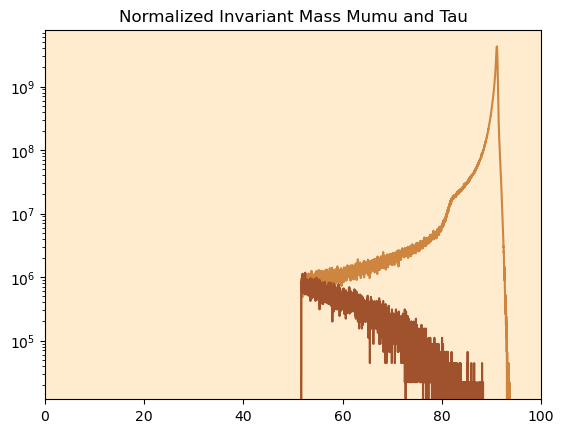

In [5]:
#normalization
w_mu = 150000000*1462.08/10000000
w_tau = 150000000*1476.58/10000000

#normalized mu
n_mu = f['p8_ee_Zmumu_ecm91/m_inv;1']
n_muy,n_mux = n_mu.to_numpy()
plt.plot(n_mux[:-1],n_muy*w_mu, color = 'peru')

#normalized tau
n_tau = f['p8_ee_Ztautau_ecm91/m_inv;1']
n_tauy,n_taux = n_tau.to_numpy()
plt.plot(n_taux[:-1],n_tauy*w_tau, color = 'sienna')

plt.yscale("log")
plt.xlim(0,100)

plt.title('Normalized Invariant Mass Mumu and Tau')
ax = plt.gca()
ax.set_facecolor('blanchedalmond')

plt.savefig("normalized invariat mass Mu and Tau")



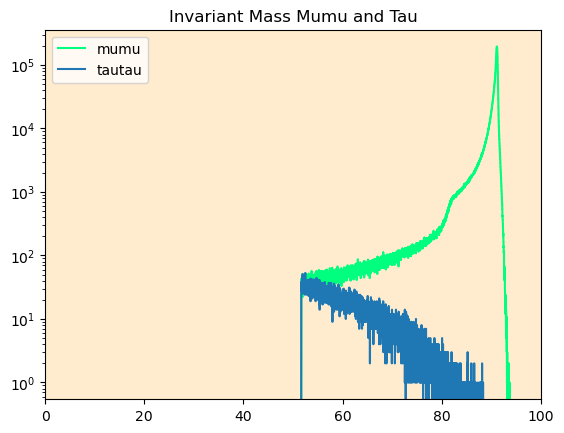

In [29]:
h = f['p8_ee_Zmumu_ecm91/m_inv;1'].to_hist()
events_per_bin, bin_edges = h.to_numpy()
plt.plot(bin_edges[:-1], events_per_bin, color = 'springgreen',drawstyle='steps-mid', label = "mumu")
plt.yscale("log")
plt.xlim(0,100)

h2 = f['p8_ee_Ztautau_ecm91/m_inv;1']
events_per_bin2, bin_edges2 = h2.to_numpy()
plt.plot(bin_edges2[:-1], events_per_bin2, drawstyle='steps-mid', label = "tautau")
plt.yscale("log")
plt.xlim(0,100)
plt.title('Invariant Mass Mumu and Tau')
plt.legend()
ax = plt.gca()
ax.set_facecolor('blanchedalmond')

In [5]:
ratio_list = []
mass_list = [] 

n = range(len(bin_edges))
for i in n:
    integral_mumu = sum(n_muy[i:]) 
    integral_tautau = sum(n_tauy[i:])
    if integral_mumu + integral_tautau > 0:
        ratio = integral_mumu/math.sqrt(integral_mumu + integral_tautau)
        ratio_list.append(ratio)
        mass_list.append(n_mux[i])
        

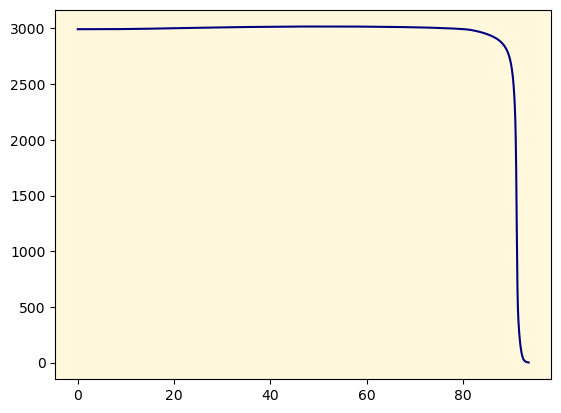

In [51]:



x = mass_list 
y = ratio_list
plt.plot(x,y, color = 'navy') 
ax = plt.gca()
ax.set_facecolor('cornsilk')







In [40]:
max_y = max(ratio_list)
max_x = x[ratio_list.index(max_y)]
print(max_x,max_y)

51.644999999999996 3017.7322466853657


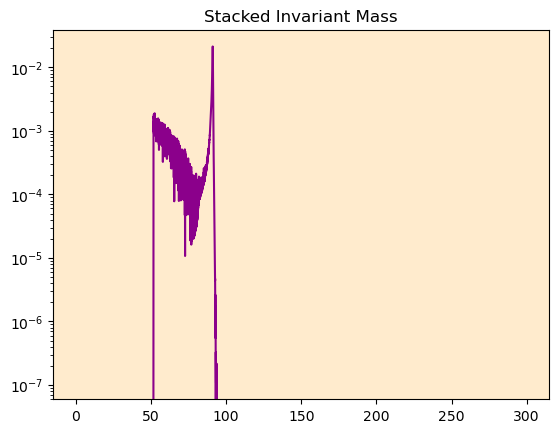

In [44]:
plt.plot(bin_edges2[:-1],events_per_bin2/sum(events_per_bin2) + events_per_bin/sum(events_per_bin), color = 'darkmagenta')
plt.yscale("log")
plt.title('Stacked Invariant Mass')

ax = plt.gca()
ax.set_facecolor('blanchedalmond')



In [15]:
total_events_mumu = sum(events_per_bin) 
print(total_events_mumu)
total_events_tautau = sum(events_per_bin2)
print(total_events_tautau)

43019.0
246785.0


In [ ]:


h3 = f['p8_ee_Zmumu_ecm91/emiss;1']
events_per_bin3, bin_edges3 = h3.to_numpy()
plt.plot(bin_edges3[:-1], events_per_bin3, drawstyle='steps-mid', label = "tautau")
plt.xlim(0,1000)
plt.yscale("log")
h4 = f['p8_ee_Ztautau_ecm91/emiss;1']
events_per_bin4, bin_edges4 = h4.to_numpy()
plt.plot(bin_edges4[:-1], events_per_bin4, drawstyle='steps-mid', label = "tautau")
plt.xlim(0,100)


(0.0, 10.0)

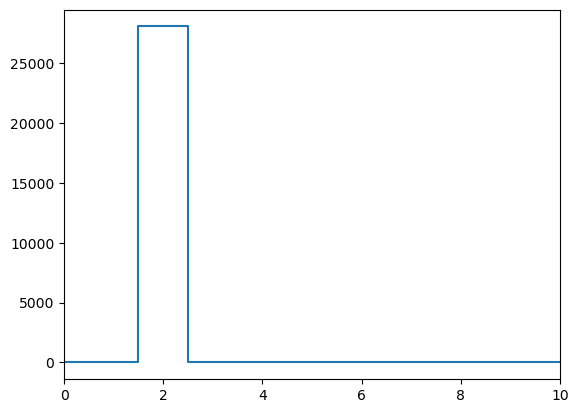

In [55]:
h3 = f['p8_ee_Ztautau_ecm91/leps_all_no;1']
events_per_bin3, bin_edges3 = h3.to_numpy()
plt.plot(bin_edges3[:-1], events_per_bin3, drawstyle='steps-mid', label = "tautau")
plt.xlim(0,10)
